In [1]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Open the Im.db and the movie_budgets dataset To explore the data

In [3]:
conn = sqlite3.connect('im.db')

In [4]:
qr = """ 
        SELECT 
                MV.movie_id , MV.start_year, MV.runtime_minutes , MV.genres, MR.averagerating, MR.numvotes, MA.ordering ,MA.title,MA.region,
                MA.types, MA.language
                
        
        FROM movie_basics As MV 
        JOIN movie_ratings AS MR ON MV.movie_id =MR.movie_id
        jOIN movie_akas AS MA On MA.movie_id=MV.movie_id
        
    """
df = pd.read_sql(qr, conn)
df.head(5)

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,types,language
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,None,hi
1,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,original,None
2,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None
3,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,None,hi
4,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,None,hi


In [5]:
df1=pd.read_csv('tn.movie_budgets.csv')
df1.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
df1.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
df['title'].sort_values(ascending=True)

49339     !Women Art Revolution
49342     !Women Art Revolution
194408            # Pire soirée
105190         #1 Serial Killer
105189         #1 Serial Killer
                  ...          
109099         Яхонты. Убийство
77048              Ящик Пандоры
5727              неЧЕСТНА ИГРА
256449                  ороолон
54451                         я
Name: title, Length: 261806, dtype: object

In [8]:
df1['movie'].sort_values(ascending=True)

5115                       #Horror
3954          (500) Days of Summer
4253           10 Cloverfield Lane
3447         10 Days in a Madhouse
3262    10 Things I Hate About You
                   ...            
1958                       mother!
697                            xXx
514     xXx: Return of Xander Cage
4756               Ã l\'intÃ©rieur
2701            é·æ±ä¸è (CJ7)
Name: movie, Length: 5782, dtype: object

In [9]:
def clean_title(title):
    return title.lower().replace(":","").replace("the ","").strip()

# Apply to both datasets
df['clean_title'] = df['title'].apply(clean_title)
df1['clean_title'] =df1['movie'].apply(clean_title)

# Merge on title + year
merged_df = pd.merge(
    df,
    df1,
    left_on=['clean_title', 'title'],
    right_on=['clean_title', 'movie'],
    how='left'
)

In [10]:
merged_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,types,language,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,None,hi,sangharsh,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,original,None,sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,None,hi,sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,None,hi,sungharsh,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262244,tt9905462,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,None,en,sisterleaf,NaN,NaN,NaN,NaN,NaN,NaN
262245,tt9905462,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,pengalila,NaN,NaN,NaN,NaN,NaN,NaN
262246,tt9911774,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,original,None,padmavyuhathile abhimanyu,NaN,NaN,NaN,NaN,NaN,NaN
262247,tt9911774,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,None,ml,pathmavyuhathile abhimanyu,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merged_df.isna().sum()

movie_id                  0
start_year                0
runtime_minutes       11262
genres                 1186
averagerating             0
numvotes                  0
ordering                  0
title                     0
region                43552
types                108640
language             225084
clean_title               0
id                   252455
release_date         252455
movie                252455
production_budget    252455
domestic_gross       252455
worldwide_gross      252455
dtype: int64

In [12]:
merged_df=merged_df.dropna(subset=[
    'movie_id' , 'start_year', 'runtime_minutes' , 'genres', 'averagerating', 'numvotes', 'ordering' ,'title','region','id',
                'types','language'
                        
                    ])

In [13]:
merged_df.isna().sum()

movie_id             0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
ordering             0
title                0
region               0
types                0
language             0
clean_title          0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
merged_df.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,types,language,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
316,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,43,Jurassic World,TR,imdbDisplay,tr,jurassic world,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
500,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,4,John Carter,CA,imdbDisplay,fr,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
528,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,32,John Carter,IL,imdbDisplay,he,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
754,tt0431021,2012,92.0,"Horror,Mystery,Thriller",5.9,53649,17,Possession,CA,imdbDisplay,fr,possession,90.0,"Aug 16, 2002",Possession,"$25,000,000","$10,103,647","$14,805,812"
886,tt0437086,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,5,Alita: Battle Angel,BD,alternative,en,alita battle angel,24.0,"Feb 14, 2019",Alita: Battle Angel,"$170,000,000","$85,710,210","$402,976,036"


### 4- Feature Engineering  , cleaning and transforming

- Splitting the Column genre with multiple textfield by preparing the Categorial data for analysis.

In [16]:
# 1. Separate the genres to combine a individual list of genres
merged_df.loc[:, 'genres_split'] = merged_df['genres'].str.split(',')
merged_df

C:\Users\teach\AppData\Local\Temp\ipykernel_50108\930662115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'genres_split'] = merged_df['genres'].str.split(',')


,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,types,language,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres_split
316,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,43,Jurassic World,TR,imdbDisplay,tr,jurassic world,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864","[Action, Adventure, Sci-Fi]"
500,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,4,John Carter,CA,imdbDisplay,fr,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100","[Action, Adventure, Sci-Fi]"
528,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,32,John Carter,IL,imdbDisplay,he,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100","[Action, Adventure, Sci-Fi]"
754,tt0431021,2012,92.0,"Horror,Mystery,Thriller",5.9,53649,17,Possession,CA,imdbDisplay,fr,possession,90.0,"Aug 16, 2002",Possession,"$25,000,000","$10,103,647","$14,805,812","[Horror, Mystery, Thriller]"
886,tt0437086,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,5,Alita: Battle Angel,BD,alternative,en,alita battle angel,24.0,"Feb 14, 2019",Alita: Battle Angel,"$170,000,000","$85,710,210","$402,976,036","[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260137,tt8976472,2018,69.0,"Documentary,Music",6.6,27,2,Never Again,XWW,imdbDisplay,en,never again,47.0,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793","[Documentary, Music]"
260483,tt9073702,2017,72.0,Drama,4.2,62,3,August,XWW,imdbDisplay,en,august,40.0,"Jul 11, 2008",August,"$3,400,000","$12,636","$12,636",[Drama]
260637,tt9110566,2018,81.0,"Horror,Thriller",6.9,20,4,Cursed,XWW,alternative,en,cursed,14.0,"Feb 25, 2005",Cursed,"$35,000,000","$19,294,901","$25,114,901","[Horror, Thriller]"
260963,tt9225192,2018,116.0,"Action,Crime",6.5,576,1,Unstoppable,XWW,imdbDisplay,en,unstoppable,19.0,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921","[Action, Crime]"


In [17]:
# 2. create a list of all the genre
all_genres = [genre for sublist in merged_df['genres_split'].dropna() for genre in sublist]
#all_genres

In [18]:
# 3. Calculate the amount of genres.
genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending=False)
genre_counts

Drama          659
Action         377
Adventure      331
Comedy         312
Thriller       236
Crime          172
Sci-Fi         152
Romance        125
Horror         123
Biography      113
Mystery         99
Animation       93
Fantasy         90
Family          71
History         50
Documentary     39
Music           29
War             24
Sport           13
Western          5
Musical          4
News             1
Name: count, dtype: int64

### Descriptive Analysis

In [20]:
merged_df[['averagerating','numvotes','ordering','production_budget','domestic_gross','worldwide_gross']].describe().round(1)

,averagerating,numvotes,ordering
count,1251.0,1251.0,1251.0
mean,6.6,134979.5,11.4
std,1.0,195836.7,9.2
min,1.6,6.0,1.0
25%,6.1,2986.5,4.0
50%,6.7,57549.0,9.0
75%,7.3,191108.5,17.0
max,8.8,1841066.0,55.0


In [21]:
type(merged_df['worldwide_gross'])

pandas.core.series.Series

### Visualization

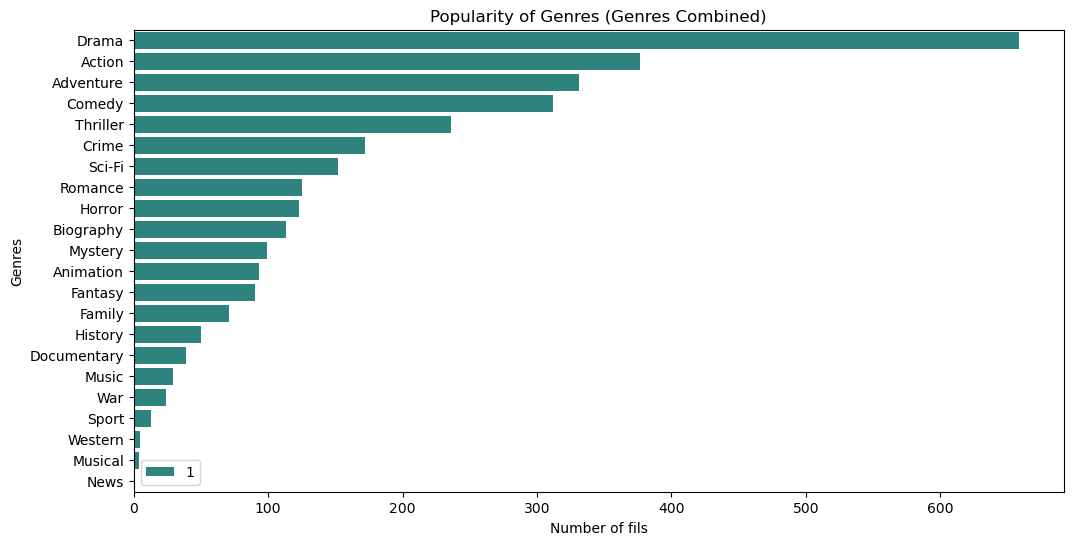

In [23]:

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=1, palette='viridis' )
plt.title('Popularity of Genres (Genres Combined)')
plt.xlabel('Number of fils')
plt.ylabel('Genres')
plt.savefig("my_plot1.png")
plt.show()

### Analysis Findings
#### Genre Analysis:

The most common genres are Drama,Comedy,  Action , Thriller /Adventure,Documentory , crime , and romance


In [25]:

numvotes= merged_df.assign(genre=merged_df['genres'].str.split(',')).explode('genre').groupby('genre').agg({'numvotes': 'sum'}).sort_values('numvotes', ascending=False)
numvotes.head(5)

,numvotes
genre,
Action,90425618
Adventure,78036114
Drama,64476982
Sci-Fi,42981851
Comedy,38170942


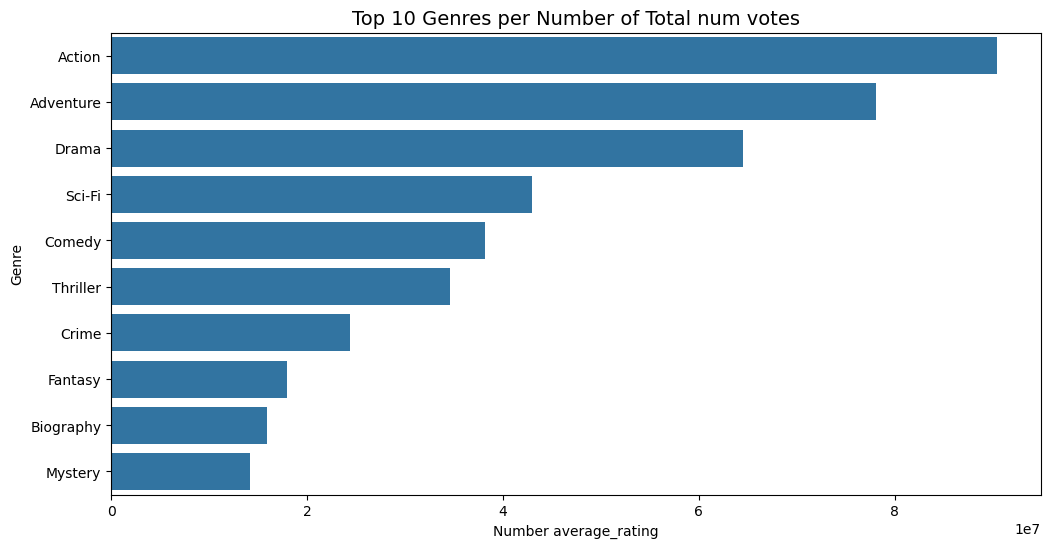

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=numvotes.sort_values("numvotes", ascending=False).head(10),
    x="numvotes",
    y="genre",   
)
plt.title("Top 10 Genres per Number of Total num votes", fontsize=14)
plt.xlabel("Number average_rating")
plt.ylabel("Genre")
plt.savefig("my_plot2.png")
plt.show()

#### use the Exploded function to create a new Dataset will all the genres separtely

In [28]:
df_exploded = (
    merged_df
    .assign(genre=lambda x: x["genres"].str.split(","))  # Crée une liste de genres
    .explode("genre")  # Éclate en plusieurs lignes
)

df_exploded

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,types,language,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres_split,genre
316,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,43,Jurassic World,TR,imdbDisplay,tr,jurassic world,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864","[Action, Adventure, Sci-Fi]",Action
316,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,43,Jurassic World,TR,imdbDisplay,tr,jurassic world,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864","[Action, Adventure, Sci-Fi]",Adventure
316,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,43,Jurassic World,TR,imdbDisplay,tr,jurassic world,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864","[Action, Adventure, Sci-Fi]",Sci-Fi
500,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,4,John Carter,CA,imdbDisplay,fr,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100","[Action, Adventure, Sci-Fi]",Action
500,tt0401729,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,4,John Carter,CA,imdbDisplay,fr,john carter,14.0,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100","[Action, Adventure, Sci-Fi]",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260637,tt9110566,2018,81.0,"Horror,Thriller",6.9,20,4,Cursed,XWW,alternative,en,cursed,14.0,"Feb 25, 2005",Cursed,"$35,000,000","$19,294,901","$25,114,901","[Horror, Thriller]",Horror
260637,tt9110566,2018,81.0,"Horror,Thriller",6.9,20,4,Cursed,XWW,alternative,en,cursed,14.0,"Feb 25, 2005",Cursed,"$35,000,000","$19,294,901","$25,114,901","[Horror, Thriller]",Thriller
260963,tt9225192,2018,116.0,"Action,Crime",6.5,576,1,Unstoppable,XWW,imdbDisplay,en,unstoppable,19.0,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921","[Action, Crime]",Action
260963,tt9225192,2018,116.0,"Action,Crime",6.5,576,1,Unstoppable,XWW,imdbDisplay,en,unstoppable,19.0,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921","[Action, Crime]",Crime


In [29]:
#merged_df.loc[: 'production_budget'] = merged_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
#merged_df.loc[: 'domestic_gross'] = merged_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
#merged_df.loc[: 'worldwide_gross'] = merged_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

merged_df = merged_df.assign(production_budget=merged_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float))
merged_df = merged_df.assign(domestic_gross=merged_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float))
merged_df = merged_df.assign(worldwide_gross=merged_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float))

In [30]:
genre_stats = (
    merged_df
    .assign(genre=lambda x: x["genres"].str.split(","))
    .explode("genre")
    .groupby("genre")
    .agg(
        total_votes=("numvotes", "sum"),
        avg_rating=("averagerating", "mean"),
        movie_count=("movie_id", "count"),
        production_budget=("production_budget", "sum"),
        domestic_gross=("domestic_gross", "sum"),
        worldwide_gross=("worldwide_gross", "sum")
        
    )
    .sort_values("genre", ascending=False)
)

genre_stats.head(10)

,total_votes,avg_rating,movie_count,production_budget,domestic_gross,worldwide_gross
genre,,,,,,
Western,1513302,7.160000,5,2.097000e+08,4.047199e+08,7.748640e+08
War,1187403,6.679167,24,5.970000e+08,4.999591e+08,1.033502e+09
Thriller,34635447,6.389407,236,9.804450e+09,1.515002e+10,3.843822e+10
Sport,1646020,6.769231,13,8.510000e+08,1.866753e+09,4.957695e+09
Sci-Fi,42981851,6.605263,152,1.560270e+10,2.130432e+10,5.890937e+10
Romance,7494722,6.581600,125,2.699100e+09,5.184398e+09,1.144022e+10
News,31,7.000000,1,1.200000e+07,6.730578e+06,4.673058e+07
Mystery,14215809,6.402020,99,3.127640e+09,4.990479e+09,1.138713e+10
Musical,144200,5.800000,4,2.480000e+08,1.396826e+08,2.829066e+08


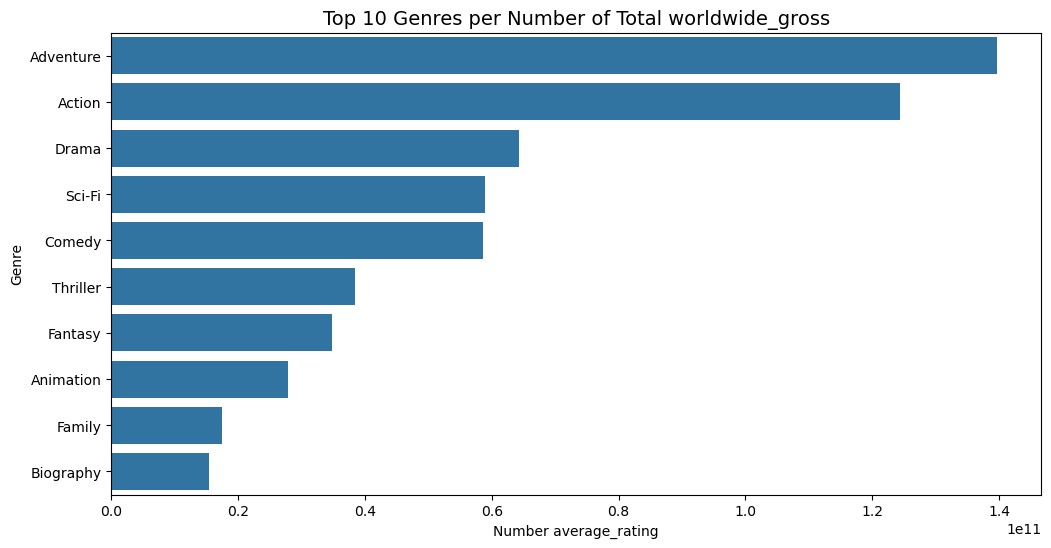

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=genre_stats.sort_values("worldwide_gross", ascending=False).head(10),
    x="worldwide_gross",
    y="genre",   
)
plt.title("Top 10 Genres per Number of Total worldwide_gross", fontsize=14)
plt.xlabel("Number average_rating")
plt.ylabel("Genre")
plt.savefig("my_plot3.png")
plt.show()

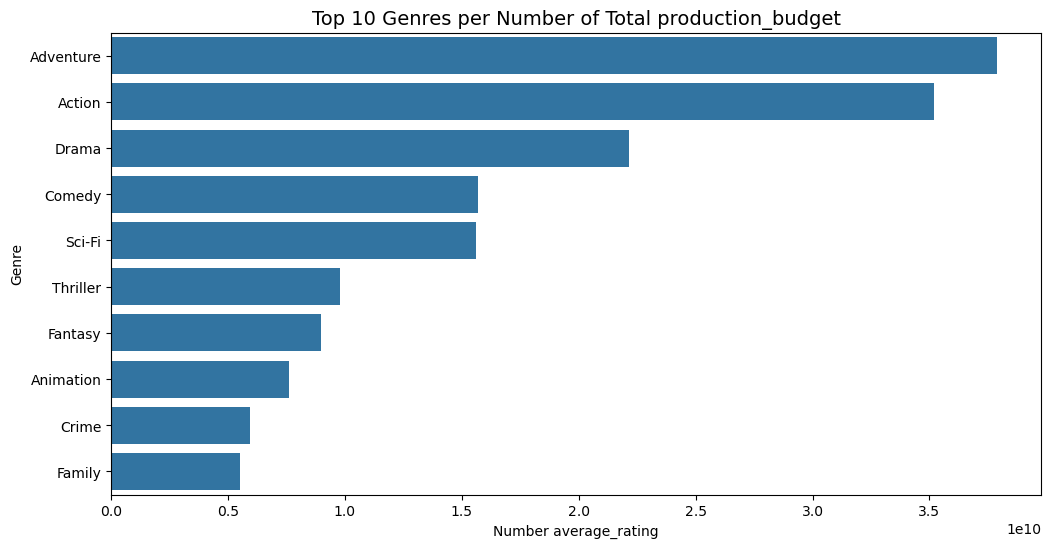

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=genre_stats.sort_values("production_budget", ascending=False).head(10),
    x="production_budget",
    y="genre",   
)
plt.title("Top 10 Genres per Number of Total production_budget", fontsize=14)
plt.xlabel("Number average_rating")
plt.ylabel("Genre")
plt.savefig("my_plot4.png")
plt.show()

### Analysis Findings
#### Genre Analysis:
However, the most successful genres (production_budget and worldwide_gross) are Adventure, Action, Drama , comedyand Thriller

In [34]:
#df_exploded= df_exploded.drop(columns=['genres'])
df_exploded['averagerating'] = df_exploded['averagerating'].astype(float)
df_exploded.to_csv("Films_f.csv", index=False)